Safecast : Band-limited interpolation of radiation measurements in Fukushima
============================================================================


In this notebook, radiation data collected by the SafeCast team from around the Fukushima Dai-ichi power plant in Japan  is used to demonstrate some basic band-limited interpolation techniques.

The notebook is pretty heavy and would require a minimium RAM of about 8 GB

The dataset and all it's implications are credited to the SafeCast team. This notebook is a lab experiment based off the the EPFL Digital Signal Processing Coursework. 
A few minor modifications have been made by me with regards to implementation.
I have explained the workings of the notebook in detail in the README.md file.


Condolences to the victims affected by the Fukushima nuclear disaster.

More about the dataset and the Safecast team at: https://www.kaggle.com/safecast/safecast




In [24]:
%pylab inline
figsize(8,6)
import numpy as np

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


The first function,  we implement a simple 1D interpolation of a bandlimited signal. A bandlimited signal is basically a set of values without any spurious high frequencies. 

Let's assume we have a number of measurements from a 1D field.

$$
\{(x_i,z_i)\}_{i=0}^{N-1}
$$

such that $z_i = f(x_i)$ and $f(x)$ is a bandlimited function as described above. This means that the following equations are satisfied.

$$
z_i = \sum_{k=-M}^M c_k\, e^{j2\pi\frac{k x_i}{T}},\ i=0,\ldots,N-1.
$$

This equation can be rewritten in matrix form as

$$
F\mathbf{c} = \mathbf{z},
$$

where $\{F\}_{ik} = e^{j2\pi\frac{x_i k}{T}}$, $\mathbf{c}=[c_{-M},\ldots,c_{M}]^T$ is a vector containing the Fourier coefficients, and $\mathbf{z}=[z_0,\ldots,z_{N-1}]^T$ are the measurements.

Note that we keep $i$ from $0$ to $N-1$, and $k$ from $-M$ to $M$, as in the initial sum. In the matrix notation, this simply means that the upper left entry of the matrix is $F_{0,-M}$.

Assuming that $N \geq 2M+1$, this system can be solved in the least-square sense to give an approximation of the Fourier coefficients

$$
\hat{\mathbf{c}} = (F^TF)^{-1}F^Tz.
$$

Given the estimated Fourier coefficients, it is now possible to estimate the field on different set of points, e.g. a regular grid. Let $\tilde{x}_i = i\frac{T}{L}$, the regularly spaced grid. Then the function at these points is

$$
\tilde{\mathbf{z}} = \tilde{F}\hat{c},
$$

where $\{\tilde{F}\}_{ik} = e^{j2\pi\frac{\tilde{x}_i k}{T}}$.

Let's now put this in practice.

In [25]:
def BL_interp_1D(x, z, T, order, grid_step=0.01, win=True):
    """
    Band-limited interpolation of 1D functions
    """
    k=expand_dims(arange(-order,order+1),0)
    F= np.exp(2j*pi*x*k/(T[1]-T[0]))
    C=dot(dot(linalg.inv(dot(F.T,F)),F.T),z)
    xg=expand_dims(arange(T[0],T[1],grid_step),1)
    if (win):
        C *= expand_dims(hanning(2*order+1), 1)
    zg=dot((exp(1j*2*pi*xg*k)/(T[1]-T[0])),C)    
    return zg,xg,C,k    

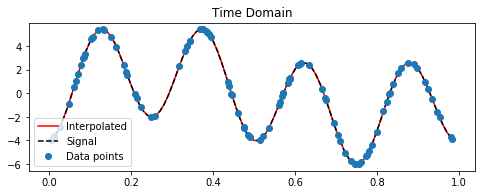

In [3]:
def MY_func(x):
    return 2*np.sin(2*pi*1*x) - 4*np.cos(2*pi*4*x)
order=6
T=[0,1]
x = (T[1]-T[0])*random.random((100,1))+T[0]
z = MY_func(x)
zp1,xp1,C1,K1=BL_interp_1D(x,z,T,order,grid_step=0.01,win=False)
subplot(2,1,1)
plot(xp1,real(zp1),'r-',xp1,MY_func(xp1),'k--',x,z,'o')
title('Time Domain')
legend(('Interpolated','Signal','Data points'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

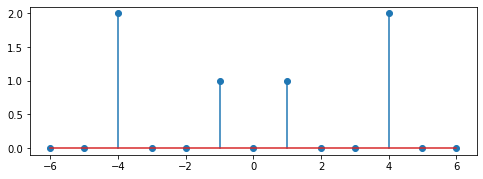

In [4]:
subplot(2,1,2)
stem(K1.T,abs(C1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


<StemContainer object of 3 artists>

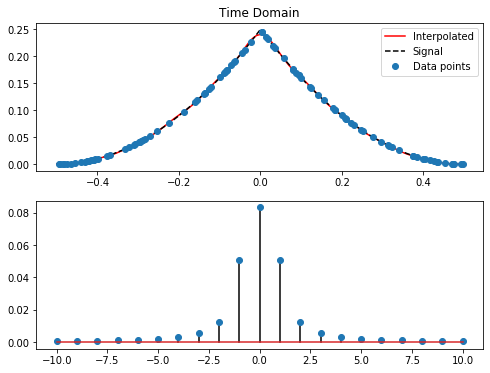

In [5]:
#trying this for a noo-band limited function 
def MY_func2(x):
    return(abs(x)-0.5)**2
order=10
T=[-0.5,0.5]
x = (T[1]-T[0])*random.random((100,1))+T[0]
z = MY_func2(x)
zp1,xp1,C1,K1=BL_interp_1D(x,z,T,order,grid_step=0.01,win=False)
subplot(2,1,1)
plot(xp1,real(zp1),'r-',xp1,MY_func2(xp1),'k--',x,z,'o')
title('Time Domain')
legend(('Interpolated','Signal','Data points'))
# Fourier Transform 
subplot(2,1,2)
stem(K1.T,abs(C1),'k')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


<StemContainer object of 3 artists>

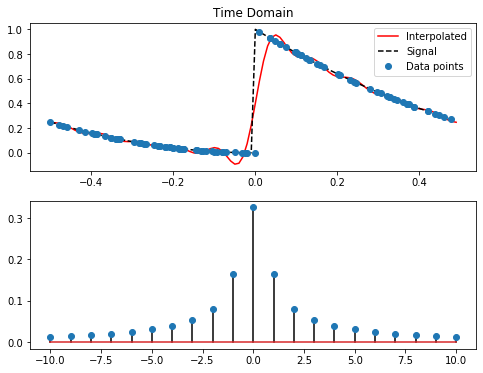

In [6]:
#Trying the same for a discontinous function 
def MY_func3(x):
    return (x-ceil(x))**2
order = 10
T=[-0.5,0.5]
x = (T[1]-T[0])*random.random((100,1))+T[0]
z = MY_func3(x)
zp1,xp1,C1,K1=BL_interp_1D(x,z,T,order,grid_step=0.01,win=False)
subplot(2,1,1)
plot(xp1,real(zp1),'r-',xp1,MY_func3(xp1),'k--',x,z,'o')
title('Time Domain')
legend(('Interpolated','Signal','Data points'))
# Fourier Transform 
subplot(2,1,2)
stem(K1.T,abs(C1),'k')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


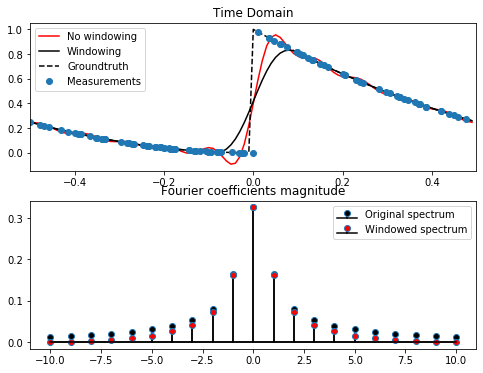

In [7]:
#exploting window for gaining more smoothness in the the interpolation. Observe the sketch below 
# compute BL interpolation
zp2, xp2, C2, k2 = BL_interp_1D(x, z, T, order, win=True)

# plot the result
subplot(2,1,1)
plot(xp1, real(zp1), 'r-', xp2, real(zp2), 'k-', xp1, MY_func3(xp1), 'k--', x, z, 'o')
xlim([-0.5,0.5])
title('Time Domain')
legend(('No windowing', 'Windowing','Groundtruth','Measurements'))

subplot(2,1,2)
markerline, stemlines, baseline = stem(K1.T, abs(C1), 'k')
setp(markerline, 'markerfacecolor', 'k')
setp(baseline, 'color','k')
markerline, stemlines, baseline = stem(k2.T, abs(C2), 'k')
setp(markerline, 'markerfacecolor', 'r')
setp(baseline, 'color','k')
legend(('Original spectrum', 'Windowed spectrum'))
title('Fourier coefficients magnitude')
show()

In [8]:
#Working with the 2D safecast dataset 
import pandas as pd
import pandas as pd
import datetime as dt
import os

#limiting the latitude/longitude only within the Fukushima area and also the year to one year from the accident 
lat_min, lon_min, lat_max, lon_max = 37.037571, 139.540087, 37.856355, 141.050707
dr = ['2011-03-11', '2012-03-11']
Value_max = 2500 #Removing high import pandas as pd

# data filename
filename = 'Safecast_data.txt'

# If the data file do not exist, we just grab all the data from Safecast's website
if (not os.path.isfile(filename)):
    
    local_full_dataset = 'measurements.csv'
    
    # if the file is not locally present, download from Safecast website
    if (not os.path.isfile(local_full_dataset)):
        df = pd.read_csv('https://api.safecast.org/system/measurements.csv', parse_dates=True, index_col=0)
    else:
        df = pd.read_csv(local_full_dataset, parse_dates=True, index_col=0)
    
    # sort the index to be ordered chronologically
    df.sort_index(inplace=True)
    
    # Select the measurements in that space-time interval
    map_space = logical_and(logical_and(df.Latitude > lat_min, df.Latitude < lat_max), logical_and(df.Longitude > lon_min, df.Longitude < lon_max))
    map_mag = logical_and(df.Value > 0, df.Value < Value_max)
    df_fuku = df[['Longitude','Latitude','Value']][logical_and(map_space, map_mag)][dr[0]:dr[1]]
    
    # save locally for further use
    df_fuku.to_csv(filename)

else:
    df_fuku = pd.read_csv(filename, error_bad_lines=False)
    
    
print('Number of measurements: ', len(df_fuku))



Number of measurements:  941573


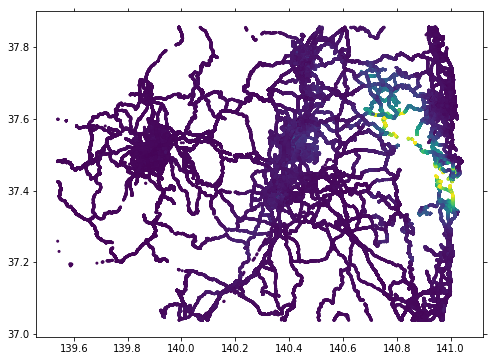

In [9]:
ax = subplot(111)
#print(type(df_fuku))
plt.scatter(df_fuku.Longitude, df_fuku.Latitude, c=df_fuku.Value, marker='.', edgecolor='none')

plt.tick_params(\
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',         # ticks along the top edge are off
    labelbottom='off',labelleft='off') # labels along the bottom and left edges are off

ax.set_aspect('equal')
axis('tight')

show()

In [10]:
# Choose an order and a padding size for the interpolation
order = 10
padding = 0.2 # unit is in degrees for lat/lon

# Recenter the coordinates to start at origin
x = expand_dims(df_fuku.Longitude - lon_min + padding, 1)
y = expand_dims(df_fuku.Latitude - lat_min + padding, 1)
z = expand_dims(df_fuku.Value, 1)

# The size of the interval to interpolate
Tx = x.max() + padding
Ty = y.max() + padding

# construct our Fourier order vectors
k = arange(-order, order+1)
l = arange(-order, order+1)
K,L = meshgrid(k,l)

# vectorize
linK = reshape(K, (1, -1))
linL = reshape(L, (1, -1))

# make the matrix
# Note, we rely here on broadcasting by numpy to get the matrix for all pairs of entries from x/linK and y/linL
F = exp(2j*pi*(x*linK/Tx + y*linL/Ty))/sqrt(Tx*Ty)

# Least-square projection
C = linalg.lstsq(F, z, 1e-2)[0]

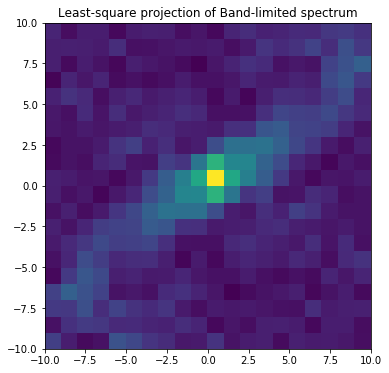

In [11]:
ax = subplot(1,1,1)
ax.pcolormesh(K, L, (abs(reshape(C, (2*order+1, 2*order+1)))))
ax.set_aspect('equal')
axis([-order, order, -order, order])
title('Least-square projection of Band-limited spectrum')
show()

In [21]:
# Pick the spacing of the grid
step = 0.005

# regularly spaced grid
xg = arange(0, Tx, step)
yg = arange(0, Ty, step)

# vectorize
Xg, Yg = meshgrid(xg, yg)
linXg = reshape(Xg, (1, -1)).T
linYg = reshape(Yg, (1, -1)).T

# 2D Hann window
W = expand_dims(hanning(2*order+1), 1)
W = W*W.T
Wlin = reshape(W, (1, -1)).T

# Reconstruct after applying the Hann window
Zprime = dot(exp(2j*pi*(linXg*linK/Tx + linYg*linL/Ty))/sqrt(Tx*Ty), Wlin*C)

# Reshape the result into the original 2D representation
ZI = real(reshape(Zprime, (len(yg), len(xg))))
print(ZI.shape)

(244, 381)


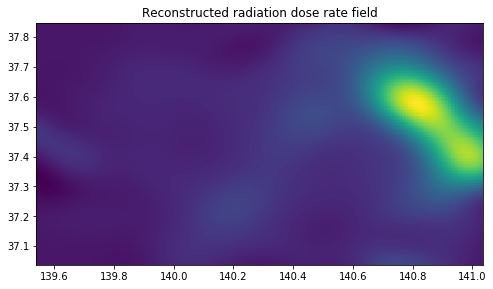

In [22]:
xmin, xmax = padding/step, (Tx-padding)/step
ymin, ymax = padding/step, (Ty-padding)/step
Lon = Xg[int(ymin):int(ymax),int(xmin):int(xmax)] + lon_min - padding
Lat = Yg[int(ymin):int(ymax),int(xmin):int(xmax)] + lat_min - padding
Field = ZI[int(ymin):int(ymax),int(xmin):int(xmax)]

ax = subplot(1,1,1)
ax.pcolormesh(Lon, Lat, Field)
ax.set_aspect('equal')
axis([Lon.min(), Lon.max(), Lat.min(), Lat.max()])
title('Reconstructed radiation dose rate field')
show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


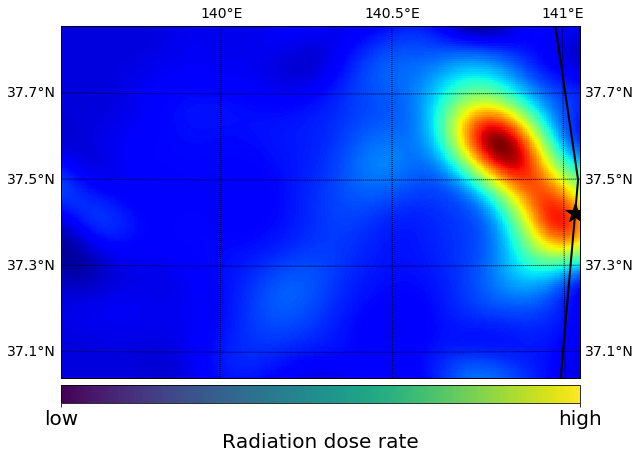

In [23]:
from mpl_toolkits.basemap import Basemap

# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
#
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='lcc',\
            lat_1=lat_min-padding,lat_2=lat_max+padding,lat_0=(lat_max+lat_min)/2.,lon_0=(lon_max+lon_min)/2.)

# draw line around map projection limb.
m.drawmapboundary(fill_color='0.3')
m.drawcoastlines(linewidth=2)
m.drawstates()
m.drawparallels(arange(37.1,38,0.2),labels=[1,1,0,0], fontsize=14)
m.drawmeridians(arange(139.5,141.5,0.5),labels=[0,0,1,0], fontsize=14)

# plot sst, then ice with pcolor
im1 = m.pcolormesh(Xg+lon_min-padding, Yg+lat_min-padding,ZI,shading='flat',cmap=plt.cm.jet,latlon=True)

nx = int((m.xmax-m.xmin)/50.)+1; ny = int((m.ymax-m.ymin)/50.)+1
ZIdat = m.transform_scalar(Field, Lon[0],Lat.T[0], nx, ny)
im1 = m.imshow(ZIdat)

# Add Dai-ichi power station
daiichi = (37.421463, 141.032556)
m.scatter(daiichi[1], daiichi[0], latlon=True, marker='*', s=400, color='k')

# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('Radiation dose rate', fontsize=20)
cb.set_ticks([ZIdat.min(), ZIdat.max()])
cb.set_ticklabels(('low','high'))
cb.ax.tick_params(labelsize=20) 

show()